## load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [9]:
import tensorflow as tf

In [11]:
from tensorflow import keras

In [14]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2567s 15us/step


In [15]:
X_train.shape

(50000, 32, 32, 3)

[6]


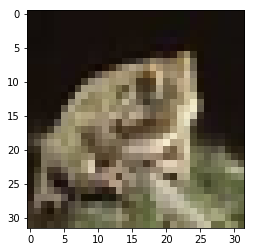

In [19]:
i = 10001
plt.imshow(X_train[i])
print(y_train[i])

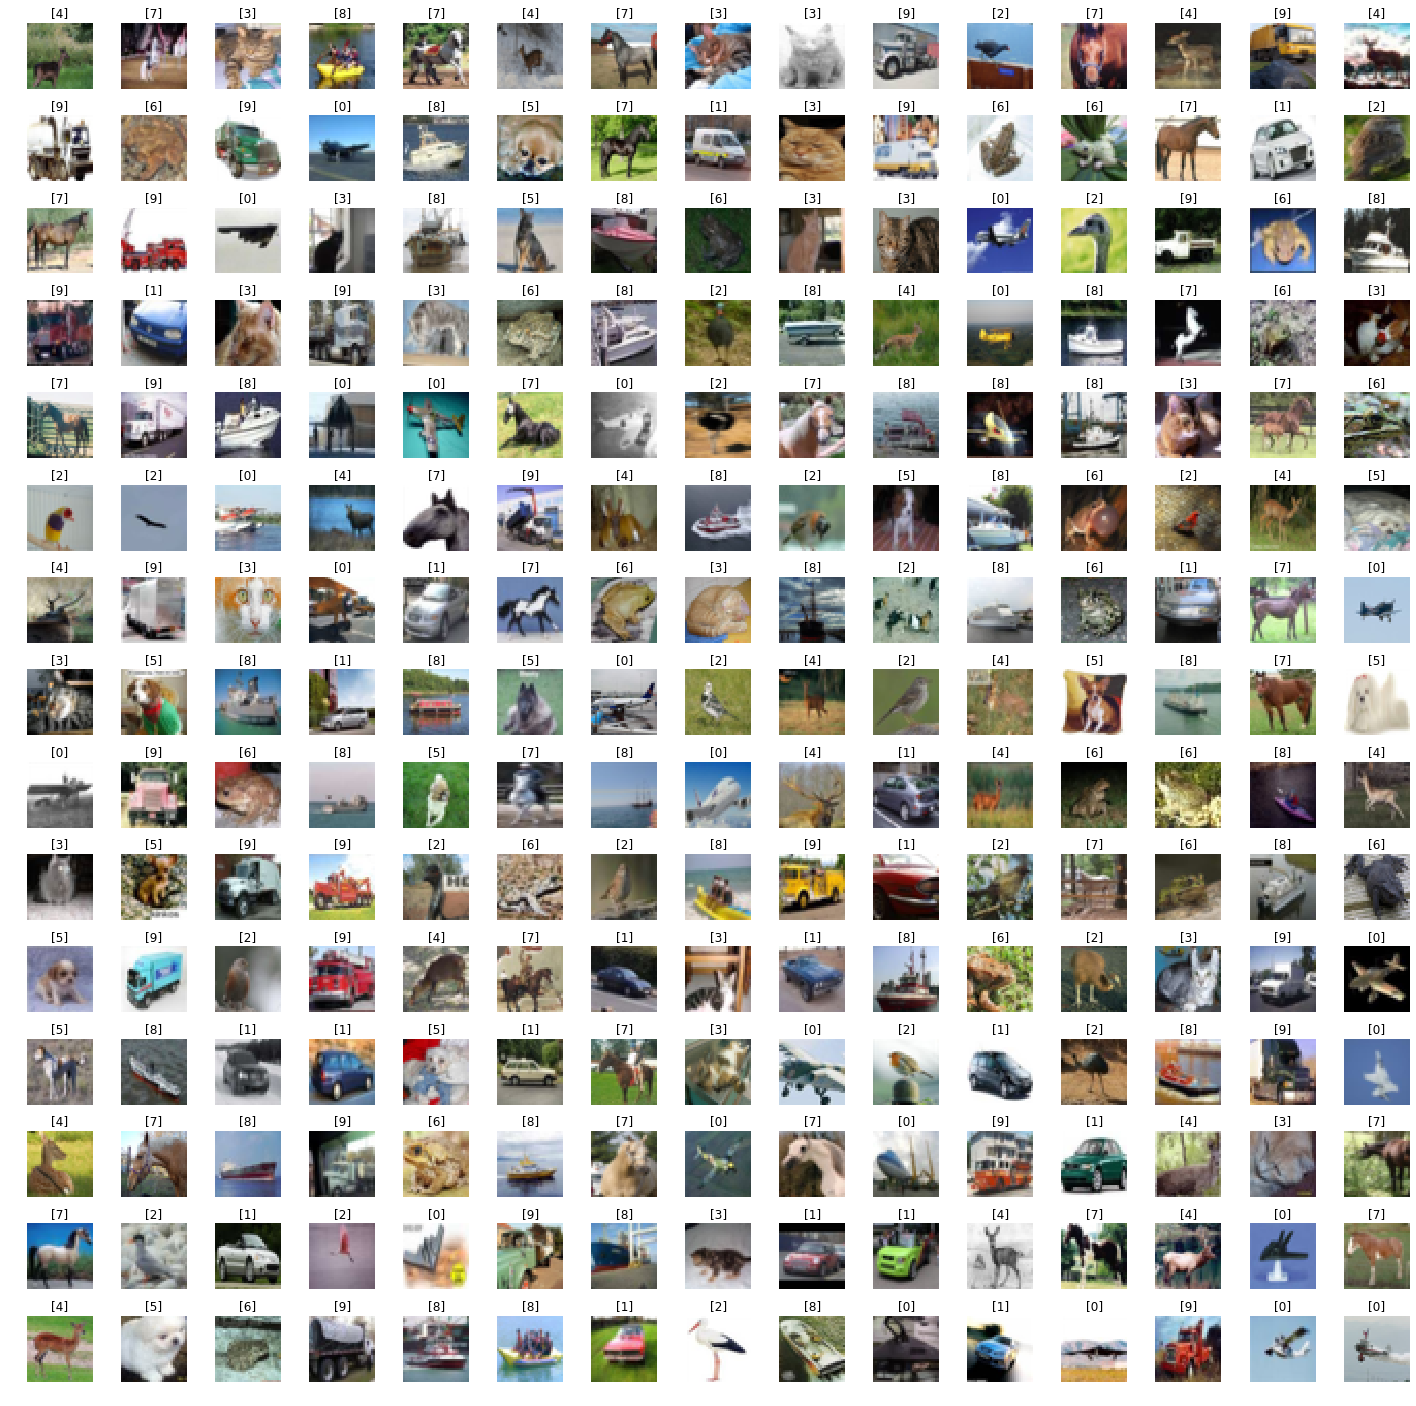

In [27]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid*W_grid ):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")
    
plt.subplots_adjust(hspace = 0.4)

## data preparation

In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [29]:
number_cat = 10

In [30]:
y_train = keras.utils.to_categorical(y_train, number_cat)

In [31]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [33]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [35]:
Input_shape = X_train.shape[1:]

In [36]:
Input_shape

(32, 32, 3)

## training the model

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [59]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation= 'relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters=128, kernel_size=(3,3),activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3),activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=10,activation='softmax'))


In [60]:
cnn_model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001), metrics=['accuracy'])

In [61]:
history = cnn_model.fit(X_train,y_train, batch_size=32, epochs = 2, shuffle= True)

Epoch 1/2
50000/50000 [==============================] - 210s 4ms/step - loss: 1.5634 - acc: 0.4256
Epoch 2/2
50000/50000 [==============================] - 210s 4ms/step - loss: 1.1944 - acc: 0.5719


In [62]:
evaluation = cnn_model.evaluate(X_test,y_test)

print("Test accuracy : {}".format(evaluation[1])) 

10000/10000 [==============================] - 7s 730us/step
Test accuracy : 0.6268


In [63]:
predicted_class = cnn_model.predict_classes(X_test)
predicted_class

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [64]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [65]:
y_test = y_test.argmax(1)

In [66]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

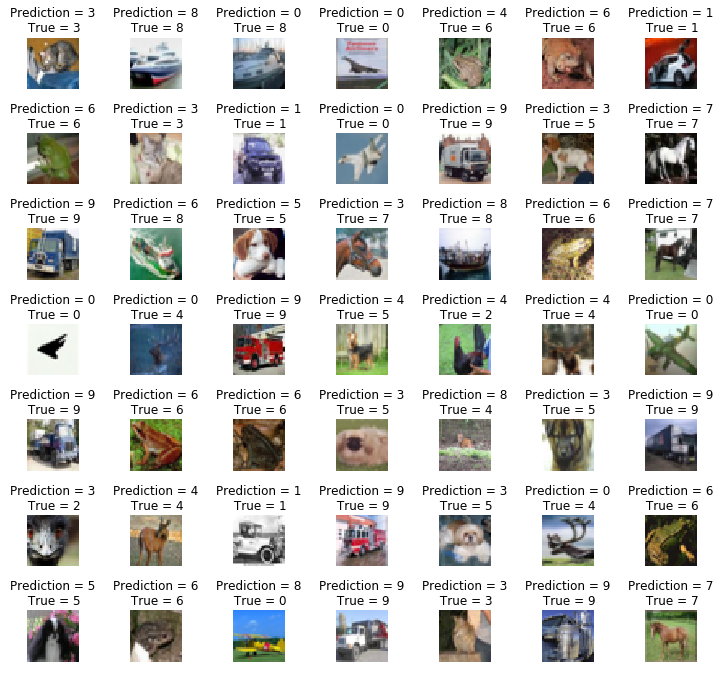

In [74]:
L = 7
W = 7

fig,axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)

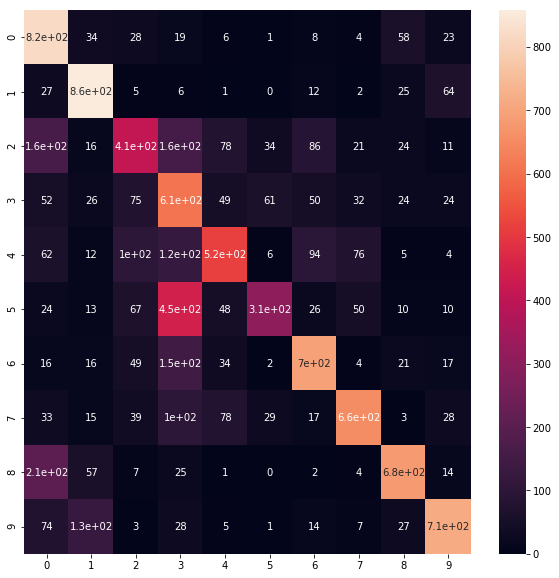

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_class)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [81]:
import os
dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
    
model_path = os.path.join(dir,'keras_cifar10_trained_model.h5')

cnn_model.save(model_path)

In [82]:
model_path

'D:\\sidjh\\ML notebook\\Exercise\\saved_models\\keras_cifar10_trained_model.h5'